# Applying PCA in IRIS AND MNIST WITH SKLEARN

# What is a PCA ??
## remember there are some math involved i am not going to cover it
## because we have high lavel API. so i am just giving the intuation about the PCA

### suppose you drink a lot of soda and you have different kinds of soda bottle in your table
### if i tell you to make a list you can make list based on many charastics like
#### 1) how old it is
#### 2) the color
#### 4) the color  etc etc

####  so like that we can compose a various different kind of list but you see some of them has related propertise (common propertise) so what you are doing is redundent. what you can do to make it a little bit easier is suumarize the list with less charastices. this summarization is called PCA(principle component analysis).so what pca does is not exactly discard the redundant .it actually constructs some new charastics using the old one .may be like a combination of characteristics like [age-acidity+someting/someting] in Fact PCA find the best possible charastics among all the liner combination.

### now lets explain what i mean by the word "summery"

### what are you looking for ??
#### you are looking for some strong properties that make difference. there are a lot of properties that almost every soda can have and this is not a useful information.because they make them all the same.so PCA will find data that actually make the variation

### What do you want??

#### so if you want to predict some information that classify a certian soda from that information you need a data that have different variation in the training set .not almost the same.because if the data has greater varience you can do it better. look at the picture

![](http://i.stack.imgur.com/jPw90.png)

### suppose two soda charastics suppose the soda concentration and acidity are correlated so depending on them every blue dot is a particular soda. now if you want to create  a new property you can draw a line through the center of the soda cloud and project all points into the line .dont understand ??? see the picture

![](http://i.stack.imgur.com/Q7HIP.gif)

#### PCA will find the best line accroding to two criteria
# 1) Variation value should be maximum
### lets explain this: the variation values along this line should be maxium. pay attention to the spread (in stat we call it 'varience') of the red dot. the position of the red dot changes when the line rotates.you can see in some position of the line the variation become maximum

### now  we reconstruct the original two charactaristictics of soda (position of blue dot) from the new one (position of red dot) 

# 2) Reconstruction error

### so we reconstruct the error now we need to find the reconstruction errir. its easy you will find it with length of the connecting red line

## you already understand what is the line
## when the line is inline with the purple line that is our position
## and you probably understand the new thing that
# when the variation become maximum the reconstruction error become minimum

# so this is the line that will be constructed by the PCA
# thats how PCA find the main charctaristics that have a high varience

In [3]:
!wget https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv

wget: /opt/conda/lib/libuuid.so.1: no version information available (required by wget)
--2020-03-22 18:28:48--  https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4600 (4.5K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.49K  --.-KB/s    in 0s      

2020-03-22 18:28:49 (49.9 MB/s) - ‘iris.csv’ saved [4600/4600]



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('iris.csv')

In [6]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## first we normalizing the data

In [7]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [8]:
X = df.drop('Name',axis = 1)

In [9]:
y = df[['Name']]

In [10]:
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y.head()

,Name
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
X = StandardScaler().fit_transform(X)

In [15]:
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [16]:
## it convert it to the numpy no problem

####  The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variatio

In [17]:
from sklearn.decomposition import PCA

In [18]:
## how uch component you want
pca = PCA(n_components=2)

In [19]:
principalComponents = pca.fit_transform(X)

In [20]:
principalComponents

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [21]:
## converting it to pandas dataframe
pdf = pd.DataFrame(data = principalComponents,columns=['pc1','pc2'])

In [22]:
pdf

,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [23]:
pdf = pd.concat([pdf,df[['Name']]],axis = 1)

In [24]:
pdf.head()

,pc1,pc2,Name
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [25]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [29]:
d = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

In [31]:
target = pdf['Name'].map(d)

In [34]:
pdf['target']  = np.array(target)

In [36]:
df = pdf.drop(['Name'],axis = 1)

In [37]:
df.target.unique()

array([0, 1, 2])

In [38]:
from sklearn.model_selection import train_test_split

In [44]:
fm = list(df.columns)
t = 'target'
fm.remove(t)

In [45]:
print(fm)
print(t)

['pc1', 'pc2']
target


In [46]:
xt,xtst,yt,ytst = train_test_split(df[fm],df[t])

In [47]:
xt.head()

,pc1,pc2
36,-2.044417,0.684956
86,1.049413,0.522197
29,-2.268790,-0.314879
92,0.330005,-0.988901
55,0.384458,-0.591062


In [48]:
xtst.head()

,pc1,pc2
24,-2.228217,0.162186
119,1.253981,-1.717584
69,0.156941,-1.303103
47,-2.398192,-0.362391
62,0.551634,-1.772582


In [49]:
yt.head()

36    0
86    1
29    0
92    1
55    1
Name: target, dtype: int64

In [50]:
ytst.head()

24     0
119    2
69     1
47     0
62     1
Name: target, dtype: int64

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
r = RandomForestClassifier()

In [53]:
r.fit(np.array(xt),yt)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
r.score(np.array(xtst),ytst)

0.8421052631578947

In [57]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target)

In [61]:
train_img = StandardScaler().fit_transform(train_img)
test_img = StandardScaler().fit_transform(test_img)

In [68]:
pca = PCA()

In [69]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [70]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [71]:
train_img

array([[ 6.29763080e+00, -9.01719082e+00,  3.48878014e+00, ...,
         1.13456976e-14,  1.40007063e-15, -1.30163719e-16],
       [ 4.66997583e+00,  1.06512301e+01,  1.14438366e+01, ...,
         3.90135065e-15,  1.79501007e-15,  2.06171355e-17],
       [-5.21223473e+00, -8.68901775e-01, -6.66303295e-01, ...,
        -1.02434783e-15, -1.09760303e-16, -1.25520135e-15],
       ...,
       [-3.47142837e+00, -3.21858507e+00,  1.55185645e+00, ...,
         2.03148277e-15,  2.66856803e-16,  2.06470891e-16],
       [ 1.09582197e+01, -1.23819576e+01, -6.49296076e+00, ...,
         2.59673158e-15, -2.23426717e-15,  4.18960965e-16],
       [-3.48244153e+00,  1.46644494e+00, -5.98435190e+00, ...,
        -1.98068762e-15, -7.86142222e-16, -5.89419404e-17]])

In [72]:
test_img

array([[-4.72326212e+00,  4.23827284e+00,  5.97347634e+00, ...,
        -1.13115147e-03,  1.28477042e-03, -1.50177189e-04],
       [-4.15687012e+00, -5.12400611e+00, -2.22591119e+00, ...,
        -1.13115147e-03,  1.28477042e-03, -1.50177189e-04],
       [ 3.85048799e-01, -2.45530434e+00,  2.32234230e+00, ...,
        -1.13115147e-03,  1.28477042e-03, -1.50177189e-04],
       ...,
       [-3.12527671e+00, -5.18189820e+00,  1.47718754e+00, ...,
        -1.13115147e-03,  1.28477042e-03, -1.50177189e-04],
       [-8.68974175e-01, -1.85246601e+00, -7.29911955e+00, ...,
        -1.13115147e-03,  1.28477042e-03, -1.50177189e-04],
       [ 7.09192886e+00, -2.01391235e+00,  1.42563328e+00, ...,
        -1.13115147e-03,  1.28477042e-03, -1.50177189e-04]])

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [75]:
logisticRegr.fit(train_img, train_lbl)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['3'], dtype=object)

In [82]:
logisticRegr.predict(test_img[0:10])

array(['3', '5', '2', '5', '5', '2', '1', '6', '0', '9'], dtype=object)

In [83]:
logisticRegr.score(test_img, test_lbl)

0.9189714285714286

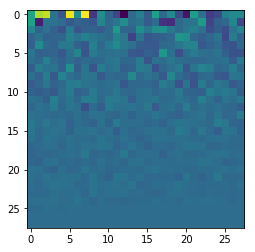

In [91]:
plt.imshow(train_img[2].reshape(28,28))